# Exploratory Analysis

In [15]:
#Import libraries

import pandas as pd
from constants import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from pandas import Series
from sklearn.preprocessing import MinMaxScaler

In [39]:
#Functions to read data

#Read values for each parameter
def read_values(index, list):
    list_values = []
    for l in list:
        list_values.append(df_main.iloc[index][l])
    return list_values

#Plot histogram for given list
def plot_histogram(list, bins, xlabel, ylabel, title):
    plt.hist(list, bins=bins, facecolor='green')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
#Check increasing sequence 
def monotonic_increase(x):
    dx = np.diff(x)
    return np.all(dx >= 0)

#Check decreasing sequence 
def monotonic_decrease(x):
    dx = np.diff(x)
    return np.all(dx <= 0)

#Check increasting then decreasing sequence 
def increase_decrease(x):
    return x[1]>=x[0] and x[2]<=x[1]

#Check increasting then decreasing sequence 
def decrease_increase(x):
    return x[1]<=x[0] and x[2]>=x[1]

In [3]:
#Read data
df_main = pd.read_csv('Data/cleaned.txt', sep=",")
print("Cleaned dataset size is",len(df_main))

Cleaned dataset size is 11087


In [9]:
#Descriptive statistics

print(df_main.dtypes)
print(df_main.describe())

cdRPKM0    float64
cdRPKM1    float64
cdRPKM2    float64
dtype: object
            cdRPKM0       cdRPKM1       cdRPKM2
count  11087.000000  11087.000000  11087.000000
mean      32.207382     35.000680     31.737374
std      100.702754    107.251175     79.427800
min        0.074259      0.073034      0.074316
25%        4.912363      5.002981      5.886184
50%       11.789318     12.465262     13.627347
75%       27.960392     30.408265     30.054516
max     2656.834519   2849.584643   2268.660153


In [13]:
#Correlation Matrix
print(df_main.corr(method='pearson'))

          cdRPKM0   cdRPKM1   cdRPKM2
cdRPKM0  1.000000  0.969042  0.907932
cdRPKM1  0.969042  1.000000  0.950209
cdRPKM2  0.907932  0.950209  1.000000


In [14]:
#Skew
print(df_main.skew())

cdRPKM0    12.843991
cdRPKM1    12.489221
cdRPKM2    11.373368
dtype: float64


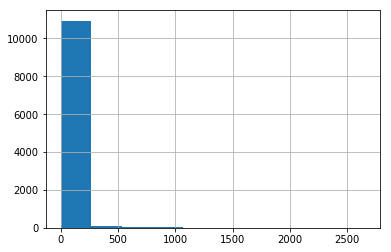

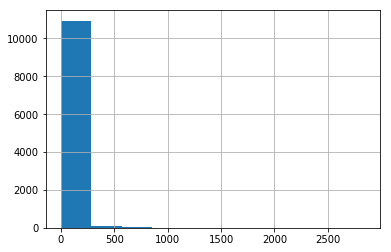

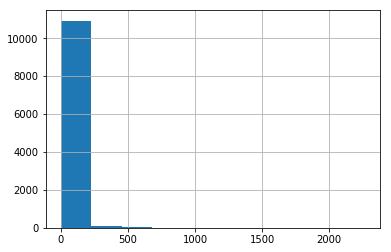

In [31]:
df_main['cdRPKM0'].hist()
plt.show()

df_main['cdRPKM1'].hist()
plt.show()

df_main['cdRPKM2'].hist()
plt.show()

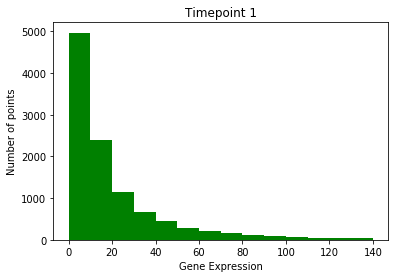

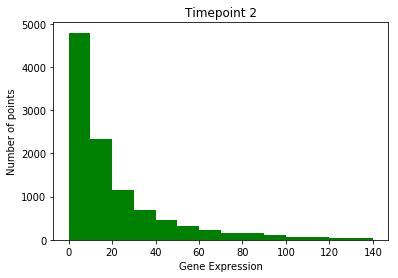

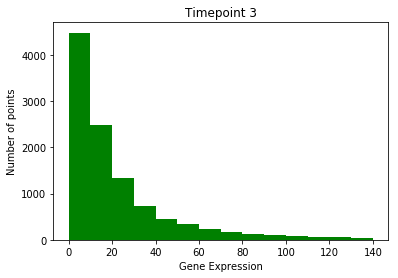

In [32]:
#Histogram of each timepoint with custom bins
bins = range(0,150,10)
xlabel = 'Gene Expression'
ylabel = 'Number of points'
title = 'Timepoint '
for i in TIMEPOINTS:
    plot_histogram(df_main['cdRPKM'+str(i)],bins,xlabel,ylabel,title+str(i+1))

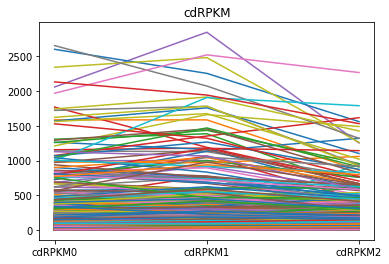

In [33]:
# Plot each parameter from graph
for i, var_plot in enumerate(PLOT):
    var_plot_list = PLOT_LIST[i]
    fig = plt.subplot(111)
    for j in range(len(df_main)): 
        expression_values = read_values(j, var_plot_list)
        fig.plot(var_plot_list, expression_values)
    plt.title(var_plot)
    plt.show()

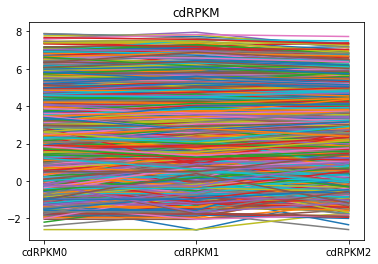

In [34]:
# Do log plot
for i, var_plot in enumerate(PLOT):
    var_plot_list = PLOT_LIST[i]
    fig = plt.subplot(111)
    for j in range(len(df_main)): 
        expression_values = read_values(j, var_plot_list)
        fig.plot(var_plot_list, np.log(expression_values))
    plt.title(var_plot)
    plt.show()

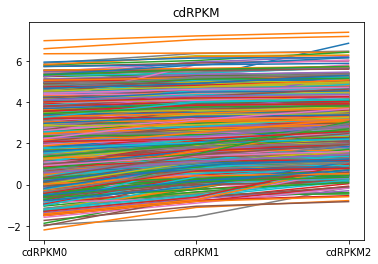

Number of increasing sequences are 2514 out of 11087


In [46]:
# Plot values increasing across time points

count=0
for i, var_plot in enumerate(PLOT):
    var_plot_list = PLOT_LIST[i]
    fig = plt.subplot(111)
    for j in range(len(df_main)): 
        expression_values = read_values(j, var_plot_list)
        if(monotonic_increase(expression_values)):
            fig.plot(var_plot_list, np.log(expression_values))
            count+=1
    plt.title(var_plot)
    plt.show()
print("Number of increasing sequences are", count, "out of", len(df_main))

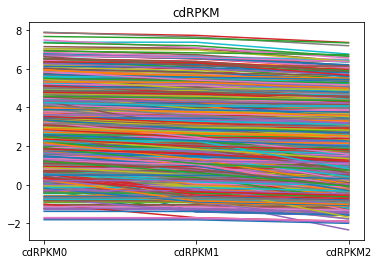

Number of decreasing sequences are 1725 out of 11087


In [47]:
# Plot values decreasing across time points

count=0
for i, var_plot in enumerate(PLOT):
    var_plot_list = PLOT_LIST[i]
    fig = plt.subplot(111)
    for j in range(len(df_main)): 
        expression_values = read_values(j, var_plot_list)
        if(monotonic_decrease(expression_values)):
            fig.plot(var_plot_list, np.log(expression_values))
            count+=1
    plt.title(var_plot)
    plt.show()
print("Number of decreasing sequences are", count,"out of", len(df_main))

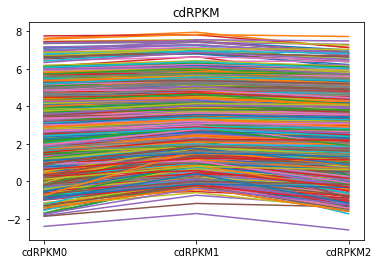

Number of increase/decrease sequences are 3430 out of 11087


In [48]:
# Plot values increasing, then decreasing across time points

count=0
for i, var_plot in enumerate(PLOT):
    var_plot_list = PLOT_LIST[i]
    fig = plt.subplot(111)
    for j in range(len(df_main)): 
        expression_values = read_values(j, var_plot_list)
        if(increase_decrease(expression_values)):
            fig.plot(var_plot_list, np.log(expression_values))
            count+=1
    plt.title(var_plot)
    plt.show()
print("Number of increase/decrease sequences are", count, "out of", len(df_main))

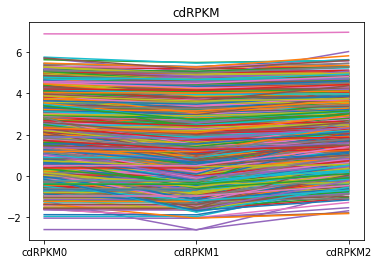

Number of decrease/increase sequences are 3418 out of 11087


In [49]:
# Plot values decreasing, then increasing across time points

count=0
for i, var_plot in enumerate(PLOT):
    var_plot_list = PLOT_LIST[i]
    fig = plt.subplot(111)
    for j in range(len(df_main)): 
        expression_values = read_values(j, var_plot_list)
        if(decrease_increase(expression_values)):
            fig.plot(var_plot_list, np.log(expression_values))
            count+=1
    plt.title(var_plot)
    plt.show()
print("Number of decrease/increase sequences are", count, "out of", len(df_main))